Libraries used include NumPy, Pandas, Matplotlib, and Seaborn. The first two are used for data manipulation, reading, and calculations, while the last two are used for visualization.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# **Project Objective**

Approval of credit cards is typically done by financial institutions, which decide whether to grant an applicant access to a credit line by issuing a card. When an application is submitted, various factors determine whether to approve or deny it. In the project, these factors will be transformed into features, including the applicant’s income level, employment status, debt-to-income ratio, and credit scores, which can objectively estimate the risk level, and other financial information. Upon approval, the applicant receives a credit card, providing them with a line of credit and a predefined credit limit, enabling them to borrow funds as needed and repay later. The ML model for credit card approval can serve as an automated credit card approval system, assisting institutions in managing risks and maintaining an efficient workload.We either approve or deny the credit card, so we have 2 outcomes and let x = 1 if approved and x = 0 otherwise. So we have Bernoulli distribution and a linear classification problem. For this reason, we will use logistic regression as a ML model.



# **Dataset overview**

In [44]:
data = pd.read_csv("clean_dataset.csv",  header=None)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       691 non-null    object
 1   1       691 non-null    object
 2   2       691 non-null    object
 3   3       691 non-null    object
 4   4       691 non-null    object
 5   5       691 non-null    object
 6   6       691 non-null    object
 7   7       691 non-null    object
 8   8       691 non-null    object
 9   9       691 non-null    object
 10  10      691 non-null    object
 11  11      691 non-null    object
 12  12      691 non-null    object
 13  13      691 non-null    object
 14  14      691 non-null    object
 15  15      691 non-null    object
dtypes: object(16)
memory usage: 86.5+ KB


In [46]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
1,1,30.83,0.0,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,00202,0,1
2,0,58.67,4.46,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,00043,560,1
3,0,24.5,0.5,1,1,Materials,Black,1.5,1,0,0,0,ByBirth,00280,824,1
4,1,27.83,1.54,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,00100,3,1


In [47]:
data[0].unique()

array(['Gender', '1', '0'], dtype=object)

Here we can see that the dataset's first row contains the actual names of the columns, and also numerical datatypes are objects. So firstly, we need to do some modifications to the dataset and also convert all numerical types from object to their actual data type.

In [48]:
# Set column names based on the values in the first row
data.columns = data.iloc[0]

# Drop the first row
data = data.drop(0)

# Reset the index
data = data.reset_index(drop=True)

# Now df contains the correct column names and the first row has been dropped
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.0,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,00202,0,1
1,0,58.67,4.46,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,00043,560,1
2,0,24.5,0.5,1,1,Materials,Black,1.5,1,0,0,0,ByBirth,00280,824,1
3,1,27.83,1.54,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,00100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,00120,0,1


In [49]:
columns_to_convert = ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed', 'PriorDefault', 'Employed',
                      'CreditScore', 'DriversLicense', 'Income', 'ZipCode', 'Approved']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [50]:
data['Industry'].unique()

array(['Industrials', 'Materials', 'CommunicationServices', 'Transport',
       'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
       'Utilities', 'ConsumerDiscretionary', 'Education',
       'ConsumerStaples', 'Healthcare', 'Research'], dtype=object)

In [51]:
data['Citizen'].unique()

array(['ByBirth', 'ByOtherMeans', 'Temporary'], dtype=object)

In [52]:
data['Ethnicity'].unique()

array(['White', 'Black', 'Asian', 'Latino', 'Other'], dtype=object)

In [53]:
data.nunique()

0
Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

From above results we can see that dataset have 690 observations, and it does not have any rows with NAN values. This dataset contains 16 variables with 15
features and 1 target variable. The Approved variable is the credit approval status and target value. The features of dataset are the following:
*   Age: Age of the applicant - continuous variable
*   Gender: 0=Female, 1=Male
*   Married: Whether the applicant is married (1) or not (0)
*   Debt: The amount of debt the applicant currently owes - continuous variable
*   Bank customer: Whether the applicant is an existing customer of the bank
(binary: ’0’, ’1’)
*   Industry: The industry in which the applicant is employed (categorical'Industrials', 'Materials', 'CommunicationServices', 'Transport',
       'InformationTechnology', 'Financials', 'Energy', 'Real Estate',
       'Utilities', 'ConsumerDiscretionary', 'Education',
       'ConsumerStaples', 'Healthcare', 'Research')
*   Ethnicity:  The ethnicity of the applicant(categorical: ’White’, ’Black’, ’Asian’,’Latino’, ’Other’)
*   Years employed: The number of years the applicant has been employed - continous variable
*    Prior default: Whether the applicant has a history of defaulting on loans
(binary: ’0’, ’1’)
*   Employed: Whether the applicant is employed or not (binary: ’0’, ’1’)
*   Credit score: A numerical score that represents the creditworthiness of the
applicant
*   Driver’s license: Whether the applicant has a valid driver’s license (binary:’0’, ’1’)

*   Citizen: Whether the applicant is a citizen of the country or not(categorical:'ByBirth', 'ByOtherMeans', 'Temporary')
*   Zipcode: The zip code or postal code of the applicant’s address
*   Income: The annual income of the applicant
*   Approval: Whether the credit card application was approved or not (binary:
’0’, ’1’)

So overall, we have 6 numerical and 9 categorical features.
Numerical features:
Age, Debt, YearsEmployed, Credit Score, ZipCode, Income
Categorical features:
Gender, Married, Bank customer, Industry, Ethnicity, Prior Default, Employed, Driver’s license, Citizen

In [54]:
data['Approved'].value_counts()

Approved
0    383
1    307
Name: count, dtype: int64

As the target variable is almost equal for both Approved and Declined applications, we can derive that dataset is balanced.

# **Dataset Cleaning/Feature Engineering**

> In order to have good predictions we need to keep the features which play significant role in deciding wether to approve or decline a request, and consequently filter out and remove the features which are correlated, have low deviation, and do not play role in our prediction.



# **Evaluating the Impact of Numerical Variables on Target variable**

In [55]:
# to calculate the percentage of missing values in each column
(data.isnull().sum()/(len(data)))*100

0
Gender            0.0
Age               0.0
Debt              0.0
Married           0.0
BankCustomer      0.0
Industry          0.0
Ethnicity         0.0
YearsEmployed     0.0
PriorDefault      0.0
Employed          0.0
CreditScore       0.0
DriversLicense    0.0
Citizen           0.0
ZipCode           0.0
Income            0.0
Approved          0.0
dtype: float64

No missing values.

**Standardization of numerical continous variables**
> Standardization transforms the features to have zero mean and unit variance. This is achieved by subtracting the mean of each feature from its values and then dividing by the standard deviation.
We need stadardization for logistic regression for the following reasons:

*  Equalizes the scale: Standardization ensures that all features have the same scale. In logistic regression, the coefficients represent the change in the log-odds of the target variable for a unit change in the corresponding feature. When features are on vastly different scales, the coefficients may become biased towards features with larger magnitudes. This can lead to a situation where the logistic regression model disproportionately emphasizes certain features over others, potentially affecting the model's predictive performance.
Improves convergence: Algorithms like gradient descent converge faster when the features are standardized. Without standardization, the algorithm might take longer to reach the minimum or even fail to converge.

*  We are going to use gradient method in our model. Standardization helps in shaping the objective function to be more symmetric and isotropic, leading to a better-conditioned optimization problem. A well-conditioned problem typically has a smoother and more regular landscape, allowing gradient descent to progress more efficiently towards the minimum.

*   As we need to compare the features to understand which one is important over other, standardized coefficients make interpretation easier.

*   Handling outliers: Standardization can mitigate the impact of outliers since it's less affected by extreme values compared to other scaling methods like Min-Max scaling. The reason is that outliers can significantly affect the mean of a feature. However, since standardization subtracts the mean from each data point, outliers have less influence on the standardized values.Outliers can also inflate the standard deviation of a feature. Standardization mitigates this effect by dividing by the standard deviation, which reduces the impact of extreme values on the spread of the data.


In [56]:
data.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income,Approved
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507,0.444928
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000,1.000000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000,1.000000


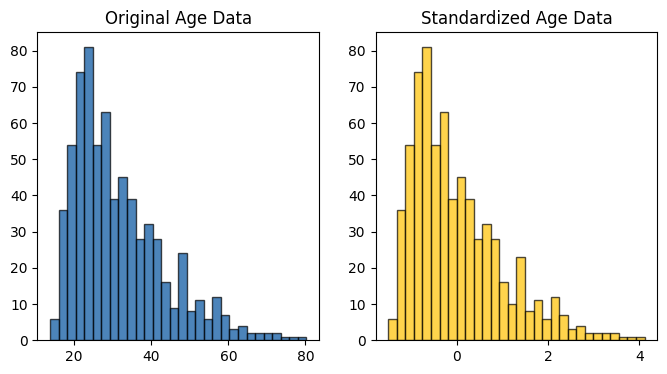

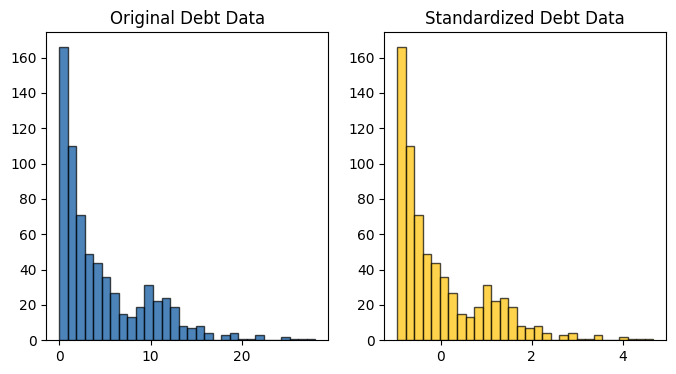

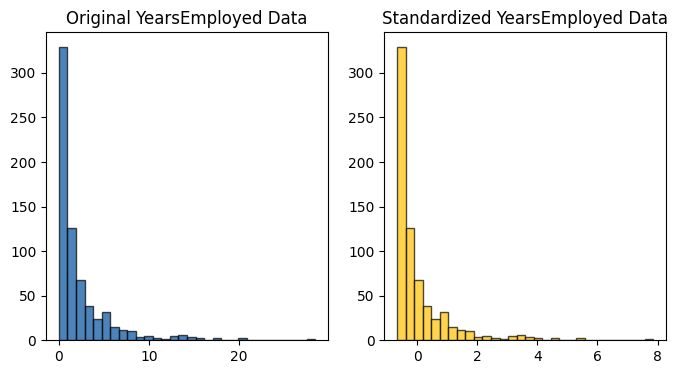

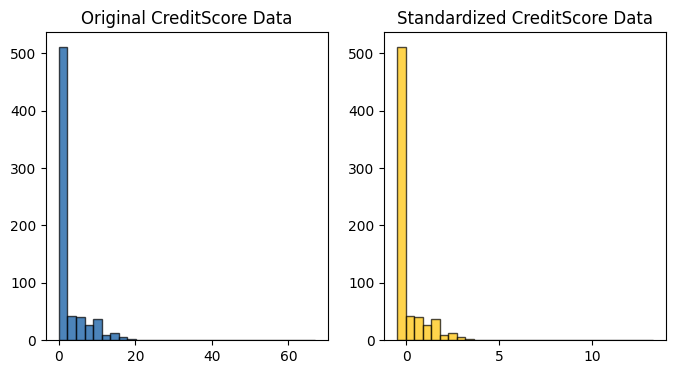

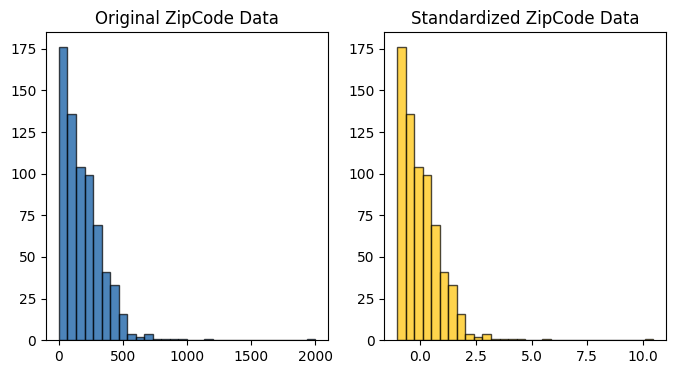

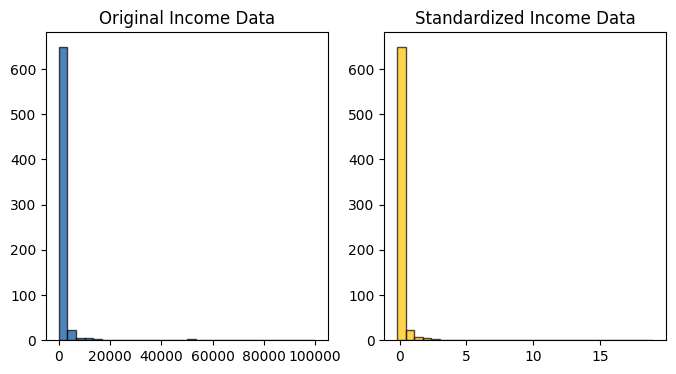

In [57]:
# List of numerical features to standardize
wanted_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'ZipCode', 'Income']

for feature in wanted_features:
    # Standardize the feature
    standardized_feature = (data[feature] - np.mean(data[feature])) / np.std(data[feature])

    # Plot histograms side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Plot original data
    axes[0].hist(data[feature], bins=30, color='#00509d', alpha=0.7, edgecolor='black')
    axes[0].set_title(f'Original {feature} Data')

    # Plot standardized data
    axes[1].hist(standardized_feature, bins=30, color='#ffc300', alpha=0.7, edgecolor='black')
    axes[1].set_title(f'Standardized {feature} Data')

    plt.show()


Here we can see that the data is highly skewed. So taking the logarithm of these values compresses them, bringing them closer to the rest of the data. This can help to mitigate the influence of extreme values on the overall distribution. Logarithmic transformation preserves the relative order of the data points, meaning that the relationships between data points are maintained. Moreover, without any computations we can see that ZipCode cannot have a role in deciding wether to approve or decline credit card request,so we can drop it.

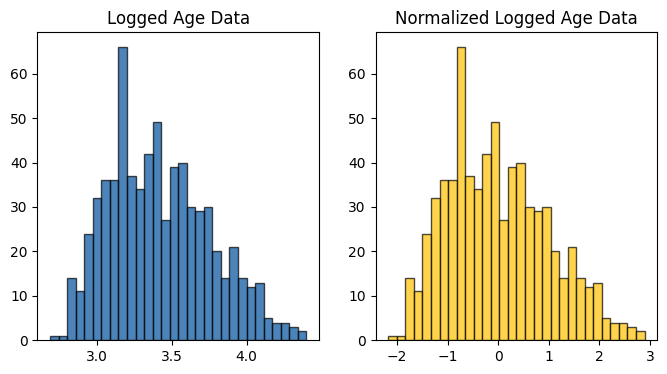

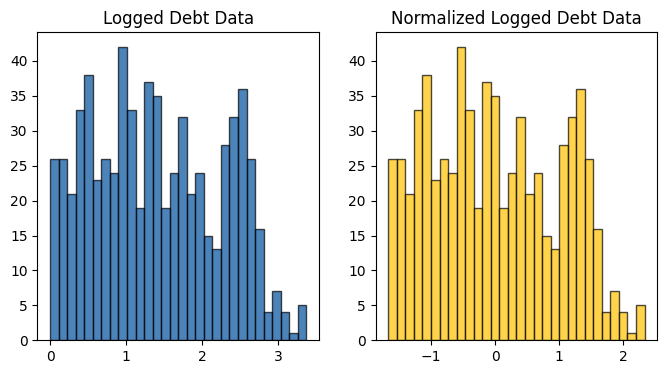

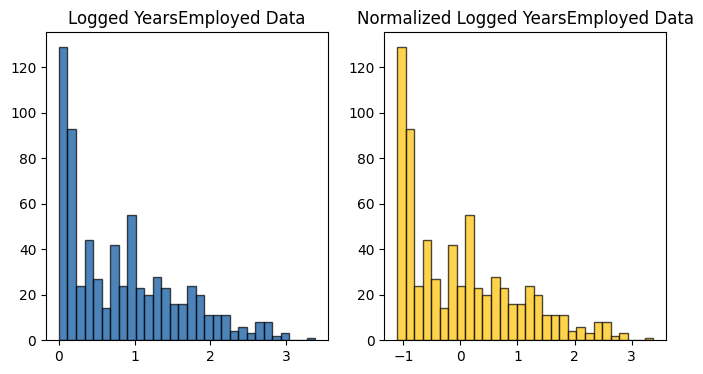

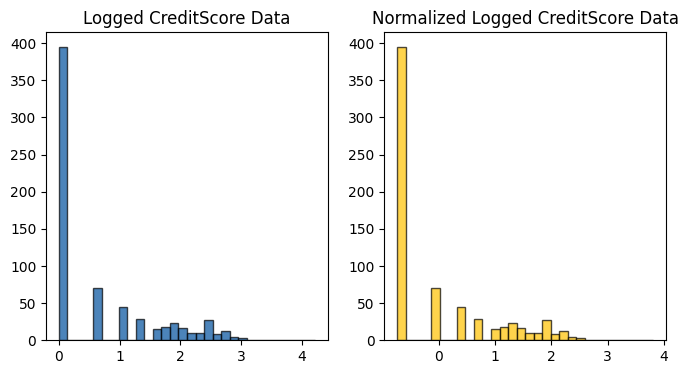

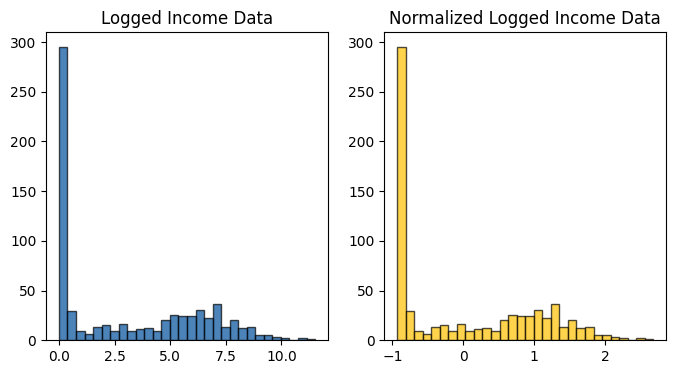

In [58]:
#dropping ZipCode
data = data.drop(['ZipCode'], axis=1)

# List of numerical features to process
wanted_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']

for feature in wanted_features:
    # Take the logarithm of the feature values
    logged_feature = np.log1p(data[feature])

    # Normalize the logged feature
    normalized_logged_feature = (logged_feature - np.mean(logged_feature)) / np.std(logged_feature)

    # Plot histograms side by side
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Plot original data
    axes[0].hist(logged_feature, bins=30, color='#00509d', alpha=0.7, edgecolor='black')
    axes[0].set_title(f'Logged {feature} Data')

    # Plot normalized data
    axes[1].hist(normalized_logged_feature, bins=30, color='#ffc300', alpha=0.7, edgecolor='black')
    axes[1].set_title(f'Normalized Logged {feature} Data')

    plt.show()

    # Replace original feature values with normalized logged ones in the DataFrame
    data[feature] = normalized_logged_feature


After normalizing we can compare numerical variables with target variable, to understand which features have more impact on predictions.

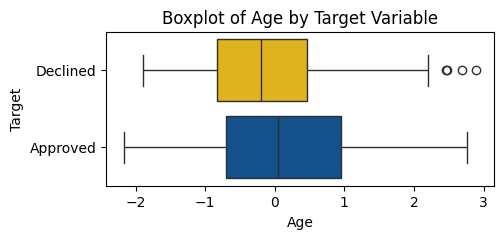

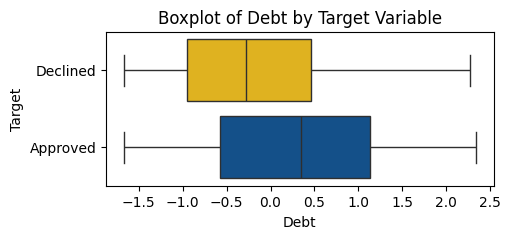

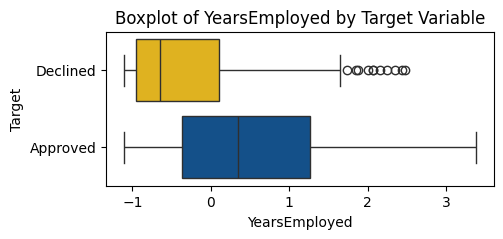

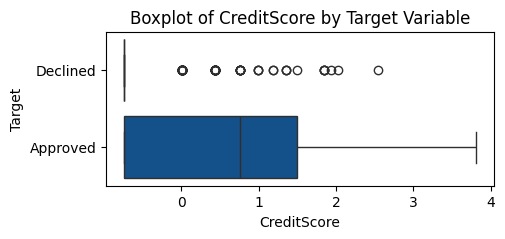

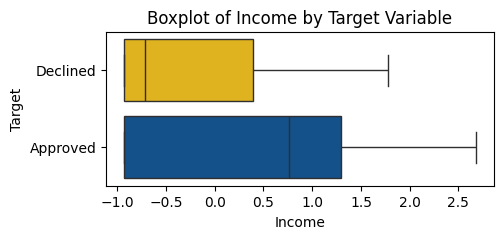

In [59]:
# List of numerical features to plot
wanted_features = ['Age', 'Debt', 'YearsEmployed', 'CreditScore', 'Income']

# Define colors for 'Declined' and 'Approved' boxplots
palette_colors = {'1': '#00509d', '0': '#ffc300'}

# Iterate through each feature
for feature in wanted_features:
    # Filter the data for each target class
    declined_feature = data[data['Approved'] == 0][feature]
    approved_feature = data[data['Approved'] == 1][feature]

    # Create horizontal boxplots
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=data[feature], y=data['Approved'], palette=palette_colors, orient='h')
    plt.title(f'Boxplot of {feature} by Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.yticks([0, 1], ['Declined', 'Approved'])
    plt.show


Analyzing the boxplots, we observe that the distribution of age and debt appears similar regardless of whether an individual was approved or declined. This suggests that age and debt levels may not significantly influence the approval decision.

Conversely, the boxplots indicate notable differences in the distribution of Credit Score, Years Employed, and Income between approved and declined cases. These variables seem to have a more pronounced impact on the approval outcome.

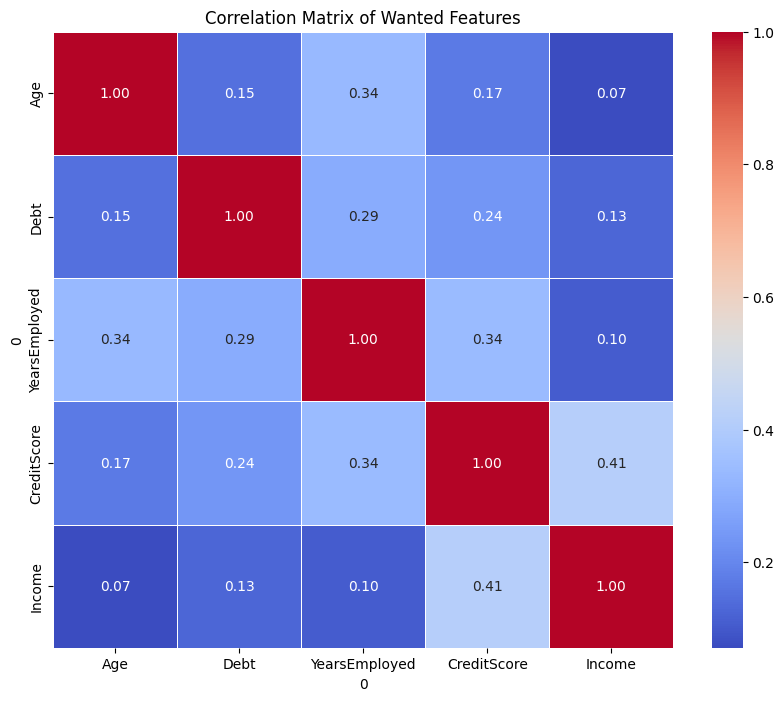

In [60]:
# Calculate correlation matrix
correlation_matrix = data[wanted_features].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Wanted Features')
plt.show()

As we see the variables are not strongly correlated => there is not any redundancy in our numerical features, prompting consideration for dropping one of them to streamline our model and prevent potential multicollinearity issues.

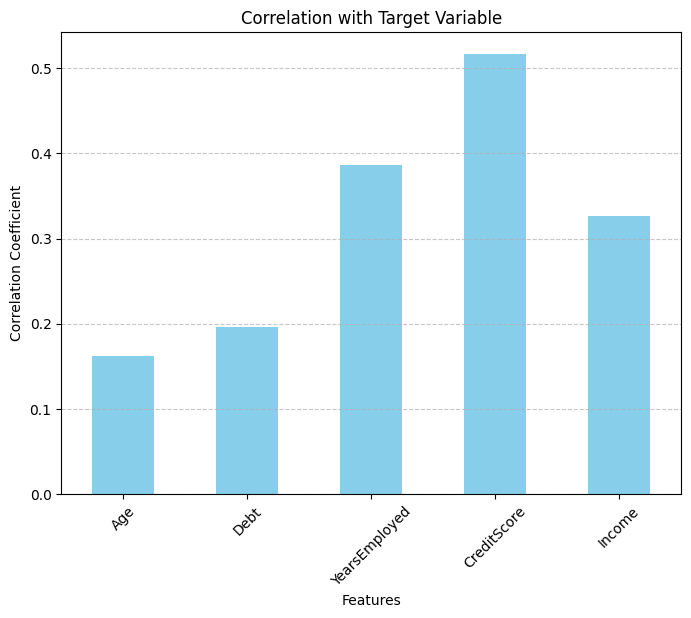

In [61]:
# Calculate correlation between target variable and each wanted feature
correlation_with_target = data[wanted_features + ['Approved']].corrwith(data['Approved'])

# Visualize correlation with target
plt.figure(figsize=(8, 6))
correlation_with_target.drop('Approved').plot(kind='bar', color='skyblue')
plt.title('Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


So age and debt does not have significant impact on prediction while YearsEmployed, CreditScore and Income have huge impact, so they are better predictors.

In [62]:
#dropping less important variables.
data = data.drop(['Age', 'Debt'], axis=1)

# **Evaluating the Impact of Categorical Variables on Target variable**

Categorical features: Gender, Married, Bank customer, Industry, Ethnicity, Prior Default, Employed, Driver’s license, Citizen. We see that for instance Driver’s license should not play a role in deciding the target variable. We can check correlations.

# Observing which categorical variables are more correlated with the target variable.

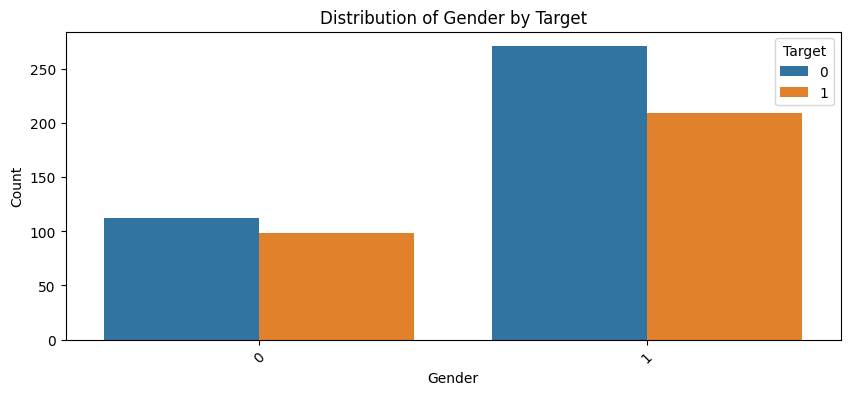

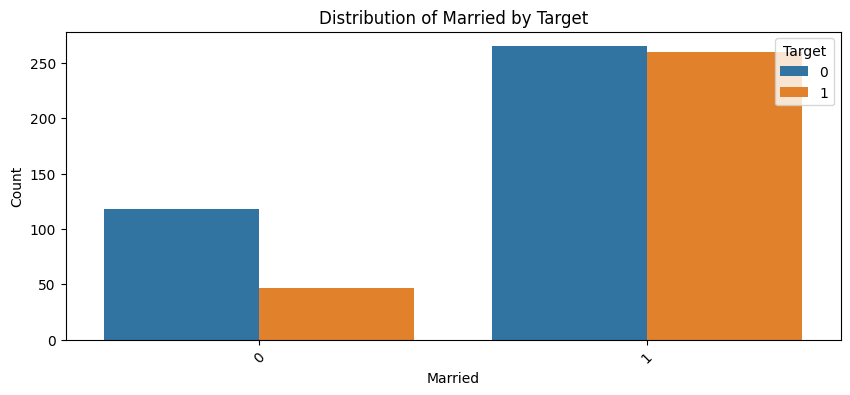

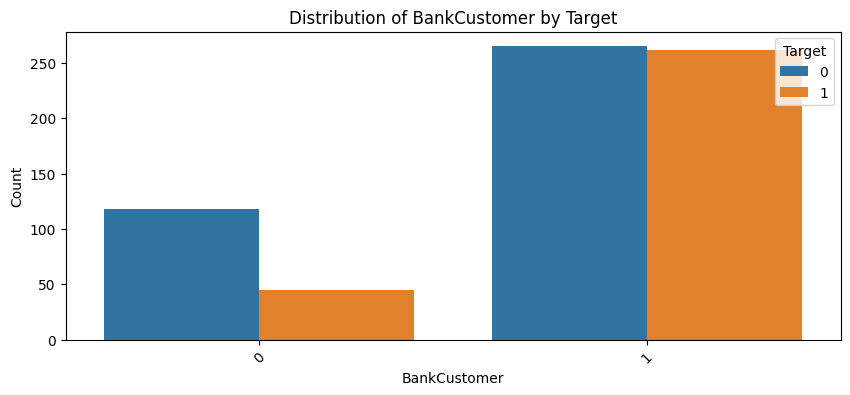

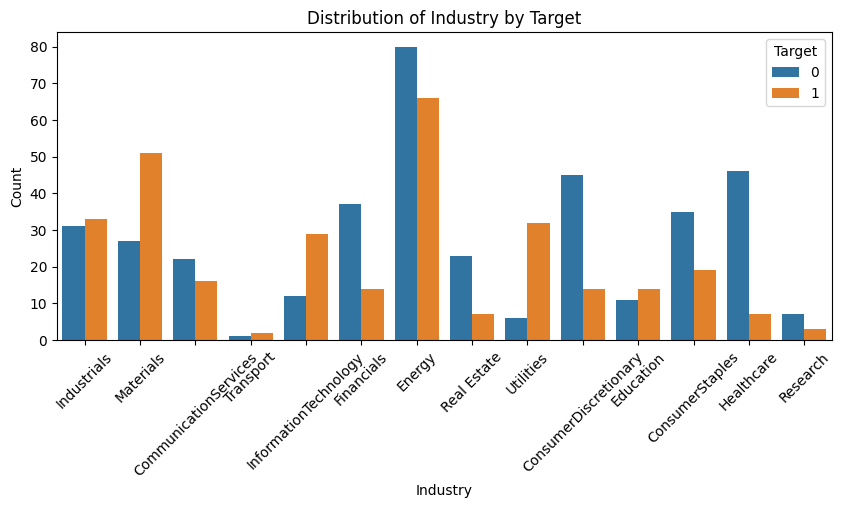

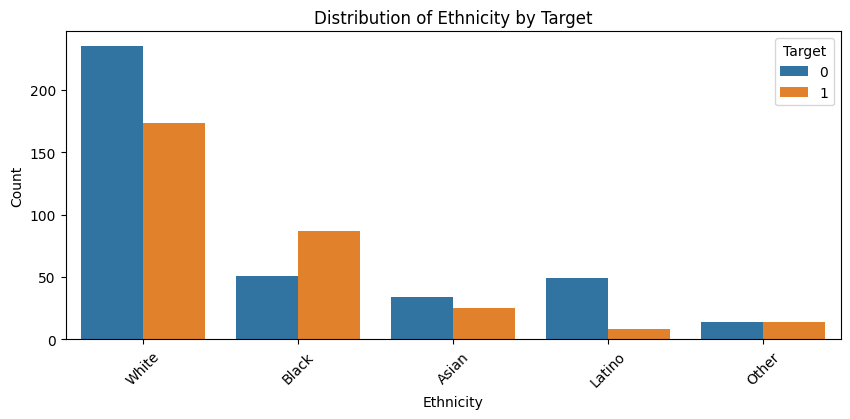

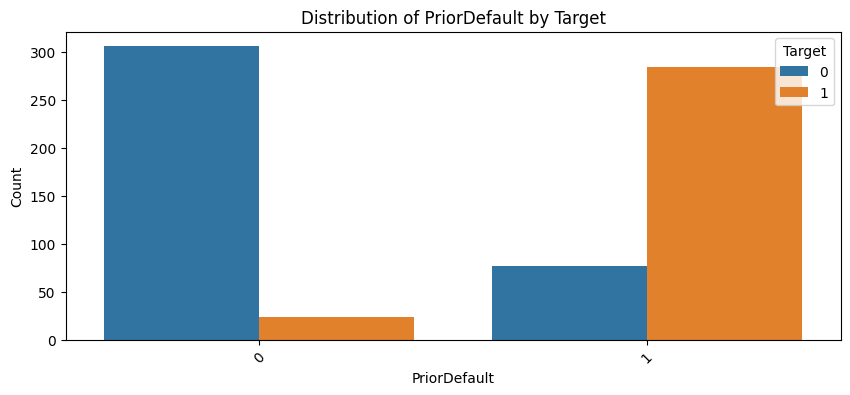

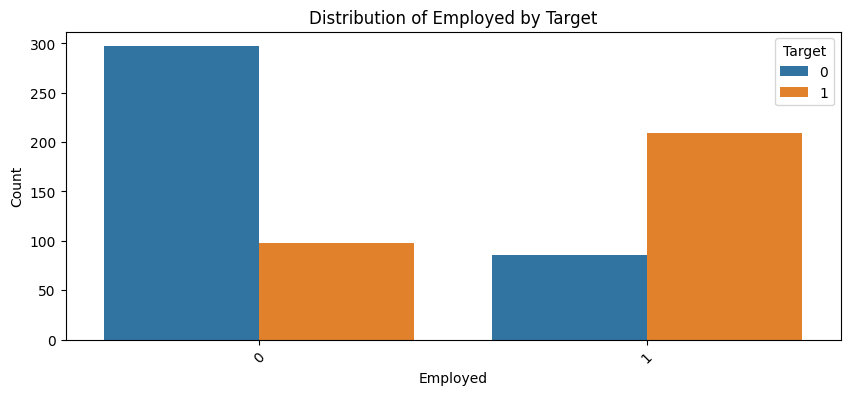

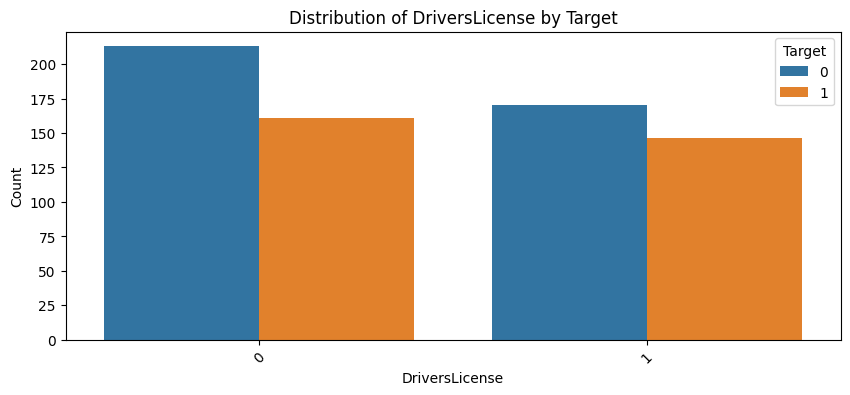

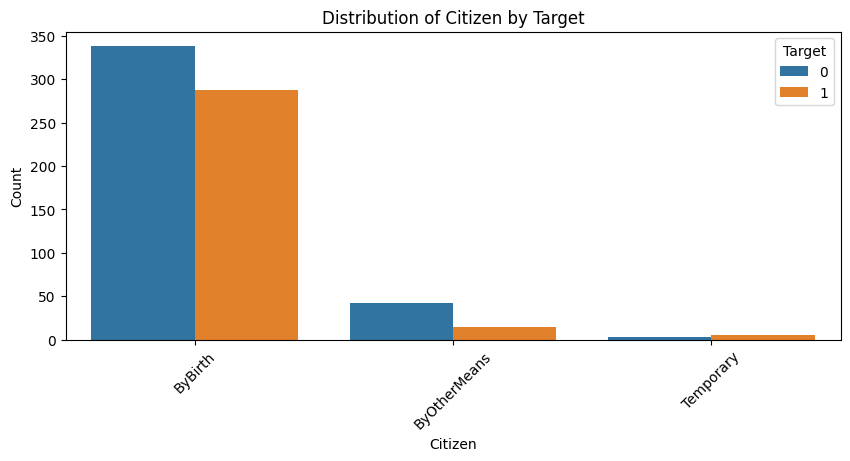

In [63]:
# Visualize frequency of each category within each target class
categorical_features = ['Gender', 'Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed', 'DriversLicense', 'Citizen']
for cat_feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=cat_feature, hue='Approved', data=data)
    plt.title(f'Distribution of {cat_feature} by Target')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.legend(title='Target', loc='upper right')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()


In [64]:
from scipy.stats import chi2_contingency

# Perform chi-square test for each categorical feature
for cat_feature in categorical_features:
    contingency_table = pd.crosstab(data[cat_feature], data['Approved'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {cat_feature}: p-value = {p_value}')


Chi-square test for Gender: p-value = 0.49853461823239953
Chi-square test for Married: p-value = 3.259721060211448e-06
Chi-square test for BankCustomer: p-value = 1.096284841948764e-06
Chi-square test for Industry: p-value = 3.502987066102028e-15
Chi-square test for Ethnicity: p-value = 1.823665654934678e-08
Chi-square test for PriorDefault: p-value = 3.1185900878457007e-79
Chi-square test for Employed: p-value = 5.6757273745274924e-33
Chi-square test for DriversLicense: p-value = 0.45094587758631943
Chi-square test for Citizen: p-value = 0.010094291370456357


The p-value in the Chi-square test measures the probability of observing the data given that the null hypothesis is true. In the context of categorical variables like Gender, Married, BankCustomer, etc., the null hypothesis typically assumes that there is no association between the two variables (i.e., they are independent).

If the p-value is less than a chosen significance level (commonly 0.04), we reject the null hypothesis and conclude that there is evidence of a statistically significant association between the variables.

Here's what can be concluded from the provided p-values:

For Gender and DriversLicense, the p-value is 0.45 - 0.4985, which is greater than 0.05. Therefore, we fail to reject the null hypothesis, suggesting that there is no significant association between Gender and the target variable. Moreover, from barplots we can also see that there is no correlation between target and gender, and target and DriversLicense.  Therefore, it might be reasonable to consider dropping Gender, DriversLicense from further analysis.

For Married, BankCustomer, Industry, Ethnicity, PriorDefault, Employed, the p-values are all much smaller than 0.04. Therefore, we reject the null hypothesis for these variables, indicating that there is a significant association between each of them and the target variable. This also can be derived from barplots.

For Citizen, the p-value is 0.0101, which is less than 0.05 but not as small as for some other variables. While there is evidence of an association between Citizen and the target variable, it may be weaker compared to other variables. In this case we can both try to predict by keeping this variable and by dropping it and see which performs better.

# Observing correlations between categorical variables.

In [65]:
import scipy.stats as stats

# Function to calculate Cramer's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for all pairs of categorical variables
categorical_features = ['Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed']

corr_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1 in categorical_features:
    for col2 in categorical_features:
        corr_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])

# Visualize the correlation matrix
print("Cramer's V correlation matrix:")
print(corr_matrix)


Cramer's V correlation matrix:
               Married BankCustomer  Industry Ethnicity PriorDefault  Employed
Married       0.996012     0.988016  0.119335  0.064679     0.136553  0.167843
BankCustomer  0.988016     0.995978  0.113245  0.042661     0.129732  0.162529
Industry      0.119335     0.113245       1.0  0.650371     0.295598  0.244542
Ethnicity     0.064679     0.042661  0.650371       1.0     0.235062  0.042375
PriorDefault  0.136553     0.129732  0.295598  0.235062     0.997091  0.427716
Employed      0.167843     0.162529  0.244542  0.042375     0.427716  0.997035


Cramer's V is a measure of association between categorical variables. It ranges from 0 to 1, where 0 indicates no association and 1 indicates perfect association.

From the correlation matrix of Cramer's V values:

Married and BankCustomer: The variables are highly associated, with a Cramer's V value close to 1. This suggests that marital status and bank customer status are strongly related.

Industry and Ethnicity: There is a moderate association between industry and ethnicity, with a Cramer's V value of around 0.65. This indicates that the type of industry and ethnicity have some level of relationship.

PriorDefault and Employed: These variables also show a moderate association, with a Cramer's V value close to 0.43. This suggests that prior default status and employment status are moderately related.

Others: The remaining pairs of variables have relatively low Cramer's V values, indicating weak or no association between them.

If two categorical variables are highly correlated (i.e., have a high Cramer's V value close to 1), it suggests that they provide similar information and may be redundant in predictive modeling. After doing some experiments and cross validations, it was obvious that removing 'Employed' strongly increased the accuarcy, however removing others were not, so we will keep them.


# Observing correlations between each numerical and categorical variable.

In [66]:
import pandas as pd
import scipy.stats as stats

categorical_variables = ['Married', 'BankCustomer', 'Industry', 'Ethnicity', 'PriorDefault', 'Employed']
numerical_variables = ['YearsEmployed', 'CreditScore', 'Income']
# Assuming 'numerical_variables' is a list of numerical variables
# 'categorical_variable' is the categorical variable
# 'data' is the DataFrame containing the dataset

# Loop through each numerical variable
for numerical_var in numerical_variables:
    # Loop through each categorical variable
    for categorical_var in categorical_variables:
        # Group the numerical variable by the categories in the categorical variable
        grouped_data = data.groupby(categorical_var)[numerical_var]

        # Perform ANOVA test
        anova_result = stats.f_oneway(*[group.values for name, group in grouped_data])

        # Print the results
        print(f"ANOVA Test for {numerical_var} with respect to {categorical_var}:")
        print("F-statistic:", anova_result.statistic)
        print("p-value:", anova_result.pvalue)
        print()


ANOVA Test for YearsEmployed with respect to Married:
F-statistic: 4.544128061178499
p-value: 0.03338553770903509

ANOVA Test for YearsEmployed with respect to BankCustomer:
F-statistic: 4.962973659994988
p-value: 0.026218236421884162

ANOVA Test for YearsEmployed with respect to Industry:
F-statistic: 3.848183552025387
p-value: 5.06973392107186e-06

ANOVA Test for YearsEmployed with respect to Ethnicity:
F-statistic: 14.977161320598888
p-value: 9.64433747722223e-12

ANOVA Test for YearsEmployed with respect to PriorDefault:
F-statistic: 149.82910755375352
p-value: 2.62345590447166e-31

ANOVA Test for YearsEmployed with respect to Employed:
F-statistic: 54.4466334505257
p-value: 4.616311094728282e-13

ANOVA Test for CreditScore with respect to Married:
F-statistic: 20.735073477923823
p-value: 6.237347477386235e-06

ANOVA Test for CreditScore with respect to BankCustomer:
F-statistic: 19.668630512263853
p-value: 1.0719733741496905e-05

ANOVA Test for CreditScore with respect to Industry

Here again if p-value is larger that 0.02 we can conclude that features are more correlated. So we see that CreditScore and Ethnicity are correlated, Icome and Industry are correlated, Income and Ethnicity are correlated, and also p-value between Income and BankCustomer, Married are notably more than p-values for other features. So removing Income may have a good impact on predictions. Moreover YearsEmployed seems to be correlated with BankCustomer and Married features. So we can experiment both by keeping it and removing.

From above analysis and some experiments, model performs better by removing 'Gender', 'DriversLicense', 'Citizen', 'Income' columns.

In [67]:
#dropping less important/more correlated feature variables.
data = data.drop(['Gender', 'DriversLicense', 'Citizen', 'Income'], axis=1)

# **One hot encoding of categorical variables.**

In [68]:
#One hot encode categorical variables
data = pd.get_dummies(data)

# Map True/False to 1/0
data = data.astype(int)
data.nunique()

Married                           2
BankCustomer                      2
YearsEmployed                     5
PriorDefault                      2
Employed                          2
CreditScore                       4
Approved                          2
Industry_CommunicationServices    2
Industry_ConsumerDiscretionary    2
Industry_ConsumerStaples          2
Industry_Education                2
Industry_Energy                   2
Industry_Financials               2
Industry_Healthcare               2
Industry_Industrials              2
Industry_InformationTechnology    2
Industry_Materials                2
Industry_Real Estate              2
Industry_Research                 2
Industry_Transport                2
Industry_Utilities                2
Ethnicity_Asian                   2
Ethnicity_Black                   2
Ethnicity_Latino                  2
Ethnicity_Other                   2
Ethnicity_White                   2
dtype: int64

# **Logistic Regression Model Implementation**

For numerical reasons, we actually minimize the following loss function

$$\mathcal{L}(\mathbf{w}) = \frac{1}{N} NLL(\mathbf{w}) +  \frac{1}{2}\lambda ||\mathbf{w}||^2_2$$

where $NLL(\mathbf{w})$ is the negative log-likelihood function.

In [69]:
def sigmoid(t):
    """
    Applies the sigmoid function elementwise to the input data.

    Parameters
    ----------
    t : array, arbitrary shape
        Input data.

    Returns
    -------
    t_sigmoid : array, arbitrary shape.
        Data after applying the sigmoid function.
    """
    return 1.0 / (1.0 + np.exp(-t))

In [70]:
def negative_log_likelihood(X, y, w):
    """
    Negative Log Likelihood of the Logistic Regression.

    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Classification targets.
    w : array, shape [D]
        Regression coefficients (w[0] is the bias term).

    Returns
    -------
    nll : float
        The negative log likelihood.
    """
    scores = sigmoid(np.dot(X, w))
    nll = -np.sum(y*np.log(scores+1e-15) + (1-y)*np.log(1-scores+1e-15))
    return nll

Computing the loss function  L(w)

In [71]:
def compute_loss(X, y, w, lmbda):
    """
    Negative Log Likelihood of the Logistic Regression.

    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Classification targets.
    w : array, shape [D]
        Regression coefficients (w[0] is the bias term).
    lmbda : float
        L2 regularization strength.

    Returns
    -------
    loss : float
        Loss of the regularized logistic regression model.
    """
    # The bias term w[0] is not regularized by convention
    return negative_log_likelihood(X, y, w) / len(y) + lmbda * 0.5 * np.linalg.norm(w[1:])**2

Compute $\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w})$

In [72]:
def get_gradient(X, y, w, mini_batch_indices, lmbda):
    """
    Calculates the gradient (full or mini-batch) of the negative log likelilhood w.r.t. w.

    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Classification targets.
    w : array, shape [D]
        Regression coefficients (w[0] is the bias term).
    mini_batch_indices: array, shape [mini_batch_size]
        The indices of the data points to be included in the (stochastic) calculation of the gradient.
        This includes the full batch gradient as well, if mini_batch_indices = np.arange(n_train).
    lmbda: float
        Regularization strentgh. lmbda = 0 means having no regularization.

    Returns
    -------
    dw : array, shape [D]
        Gradient w.r.t. w.
    """
    n_batch = mini_batch_indices.shape[0]

    nll_gradient = np.dot(X[mini_batch_indices].T,sigmoid(np.dot(X[mini_batch_indices], w)) - y[mini_batch_indices])

    ones = np.ones(w.shape)
    ones[0] = 0
    reg_gradient = lmbda * ones * w

    # we could also do (nll_gradient + reg_gradient) / n_batch.
    # this will only change how we need to tune lambda in practice
    grad = nll_gradient / n_batch + reg_gradient

    return grad

In [73]:
def logistic_regression(X, y, num_steps, learning_rate, mini_batch_size, lmbda, verbose):
    """
    Performs logistic regression with (stochastic) gradient descent.

    Parameters
    ----------
    X : array, shape [N, D]
        (Augmented) feature matrix.
    y : array, shape [N]
        Classification targets.
    num_steps : int
        Number of steps of gradient descent to perform.
    learning_rate: float
        The learning rate to use when updating the parameters w.
    mini_batch_size: int
        The number of examples in each mini-batch.
        If mini_batch_size=n_train we perform full batch gradient descent.
    lmbda: float
        Regularization strentgh. lmbda = 0 means having no regularization.
    verbose : bool
        Whether to print the loss during optimization.

    Returns
    -------
    w : array, shape [D]
        Optimal regression coefficients (w[0] is the bias term).
    trace: list
        Trace of the loss function after each step of gradient descent.
    """

    trace = [] # saves the value of loss every 50 iterations to be able to plot it later
    n_train = X.shape[0] # number of training instances

    w = np.zeros(X.shape[1]) # initialize the parameters to zeros

    # run gradient descent for a given number of steps
    for step in range(num_steps):
        permuted_idx = np.random.permutation(n_train) # shuffle the data

        # go over each mini-batch and update the paramters
        # if mini_batch_size = n_train we perform full batch GD and this loop runs only once
        for idx in range(0, n_train, mini_batch_size):
            # get the random indices to be included in the mini batch
            mini_batch_indices = permuted_idx[idx:idx+mini_batch_size]
            gradient = get_gradient(X, y, w, mini_batch_indices, lmbda)

            # update the parameters
            w = w - learning_rate * gradient

        # calculate and save the current loss value every 50 iterations
        if step % 50 == 0:
            loss = compute_loss(X, y, w, lmbda)
            trace.append(loss)
            # print loss to monitor the progress
            if verbose:
                print('Step {0}, loss = {1:.4f}'.format(step, loss))
    return w, trace

In [74]:
def predict(X, w):
    """
    Parameters
    ----------
    X : array, shape [N_test, D]
        (Augmented) feature matrix.
    w : array, shape [D]
        Regression coefficients (w[0] is the bias term).

    Returns
    -------
    y_pred : array, shape [N_test]
        A binary array of predictions.
    """

    return (sigmoid(np.dot(X, w)) > 0.5).astype(int)

In [75]:
X = data.drop(columns=['Approved'])  # Features (remove the target variable column)
y = data['Approved']  # Target variable
# Add a vector of ones to the data matrix to absorb the bias term

X = np.hstack([np.ones([X.shape[0], 1]), X])
# Set the random seed so that we have reproducible experiments
np.random.seed(12345)

# Split into train and test
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

y_train = y_train.to_numpy()

# **5-Fold Cross Validation for the Model**

 **Sklearn's results**

In [76]:
# Initialize the logistic regression model
logreg = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores_sklearn = cross_val_score(logreg, X_train, y_train, cv=kf)
# Perform cross-validation and calculate the F1 scores
f1_scores_sklearn = cross_val_score(logreg,X_train, y_train, cv=kf, scoring='f1')
# Calculate precision and recall scores
precision_scores_sklearn = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='precision')
recall_scores_sklearn = cross_val_score(logreg, X_train, y_train, cv=kf, scoring='recall')

mean_accuracy_sk= np.mean(scores_sklearn)
mean_f1_sk = np.mean(f1_scores_sklearn)
mean_precision_sk = np.mean(precision_scores_sklearn)
mean_recall_sk = np.mean(recall_scores_sklearn)

**Model's results**

In [77]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import numpy as np

# Define the number of splits for cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize an array to store the cross-validation scores
accuracy_full_batch = []
f1_full_batch = []
precision_full_batch = []
recall_full_batch = []

# Perform cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Train your logistic regression model using your implemented function
    w_full, trace_full = logistic_regression(X_train_fold,
                                             y_train_fold,
                                             num_steps=1000,
                                             learning_rate=1.3,
                                             mini_batch_size=X_train_fold.shape[0],
                                             lmbda=0.01,
                                             verbose=False)  # Set verbose to False if you don't want output during training

    y_pred_full_batch = predict(X_test_fold, w_full)
    # Calculate performance metrics for full-batch model
    accuracy_full_batch.append(accuracy_score(y_test_fold, y_pred_full_batch))
    f1_full_batch.append(f1_score(y_test_fold, y_pred_full_batch))
    precision_full_batch.append(precision_score(y_test_fold, y_pred_full_batch))
    recall_full_batch.append(recall_score(y_test_fold, y_pred_full_batch))

# Compute the mean of the performance metrics for the full-batch model
mean_accuracy = np.mean(accuracy_full_batch)
mean_f1 = np.mean(f1_full_batch)
mean_precision = np.mean(precision_full_batch)
mean_recall = np.mean(recall_full_batch)


In [78]:
print('Custom implementation results: accuracy: {:.4f}, f1_score: {:.4f}, precision_score: {:.4f}, recall_score: {:.4f}'
      .format(mean_accuracy, mean_f1, mean_precision, mean_recall))

print('Sklearn implementation results: accuracy: {:.4f}, f1_score: {:.4f}, precision_score: {:.4f}, recall_score: {:.4f}'
      .format(mean_accuracy_sk, mean_f1_sk, mean_precision_sk, mean_recall))

Custom implementation results: accuracy: 0.8514, f1_score: 0.8361, precision_score: 0.8154, recall_score: 0.8618
Sklearn implementation results: accuracy: 0.8496, f1_score: 0.8387, precision_score: 0.8098, recall_score: 0.8618


Here we see that with mentioned parameters our model perfoms well for 5 fold validation and the accuracy and all other measures' results are close to sklearn's results. So we can run model on test data.

**Results on test data**

In [79]:
# Change this to True if you want to see loss values over iterations.
verbose = False

In [80]:
n_train = X_train.shape[0]
w_full, trace_full = logistic_regression(X_train,
                                         y_train,
                                         num_steps=1000,
                                         learning_rate=1.3,
                                         mini_batch_size=n_train,
                                         lmbda=0.01,
                                         verbose=verbose)
w_minibatch, trace_minibatch = logistic_regression(X_train,
                                                   y_train,
                                                   num_steps=1000,
                                                   learning_rate=1.3,
                                                   mini_batch_size=300,
                                                   lmbda=0.01,
                                                   verbose=verbose)

In [81]:
#sklear's result
# Initialize the logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [82]:
y_pred_full = predict(X_test, w_full)
y_pred_minibatch = predict(X_test, w_minibatch)


print('Full batch with sklearn: accuracy: {:.4f}, f1_score: {:.4f}, precision_score: {:.4f}, recall_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)))
print('Full batch: accuracy: {:.4f}, f1_score: {:.4f}, precision_score: {:.4f}, recall_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_full), f1_score(y_test, y_pred_full), precision_score(y_test, y_pred_full), recall_score(y_test, y_pred_full)))
print('Mini-batch: accuracy: {:.4f}, f1_score: {:.4f}, precision_score: {:.4f}, recall_score: {:.4f}'
      .format(accuracy_score(y_test, y_pred_minibatch), f1_score(y_test, y_pred_minibatch), precision_score(y_test, y_pred_minibatch), recall_score(y_test, y_pred_minibatch)))

Full batch with sklearn: accuracy: 0.8623, f1_score: 0.8527, precision_score: 0.8333, recall_score: 0.8730
Full batch: accuracy: 0.8768, f1_score: 0.8682, precision_score: 0.8485, recall_score: 0.8889
Mini-batch: accuracy: 0.8768, f1_score: 0.8682, precision_score: 0.8485, recall_score: 0.8889


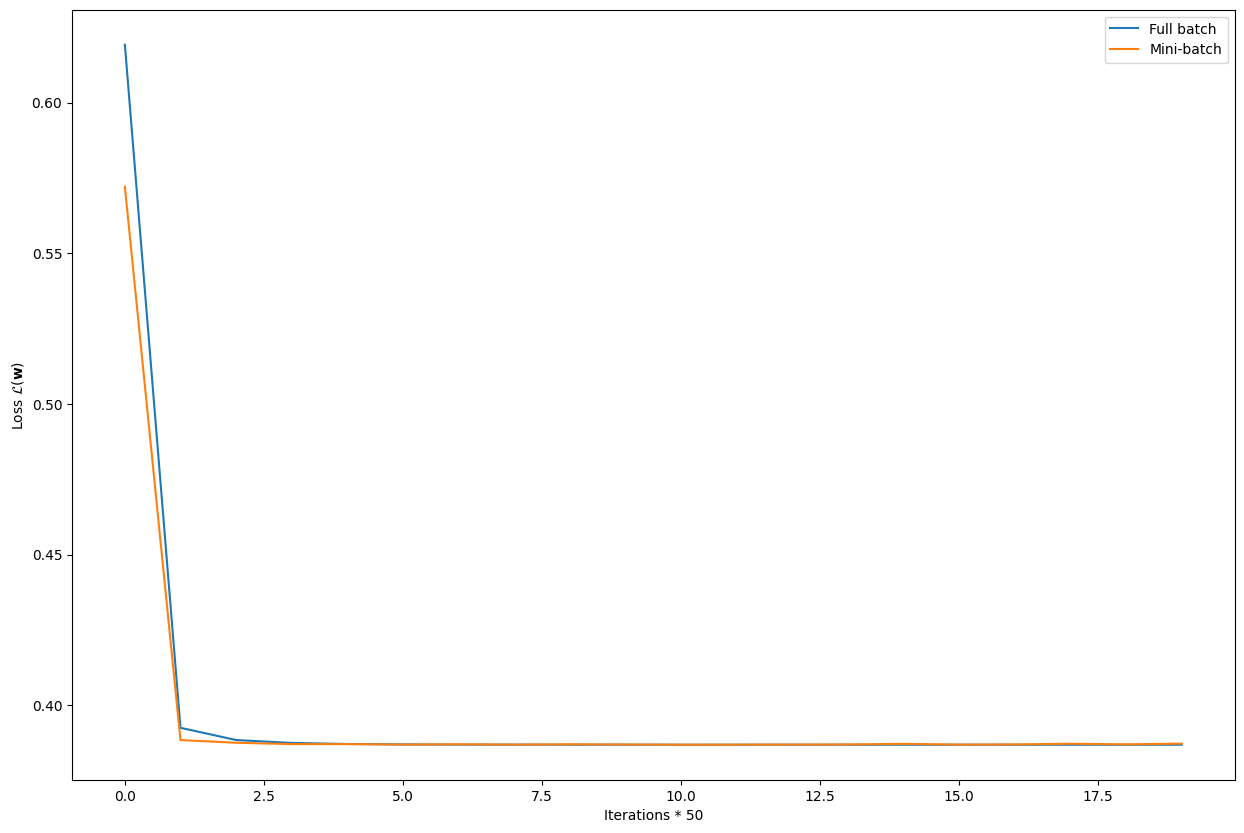

In [83]:
plt.figure(figsize=[15, 10])
plt.plot(trace_full, label='Full batch')
plt.plot(trace_minibatch, label='Mini-batch')
plt.xlabel('Iterations * 50')
plt.ylabel('Loss $\mathcal{L}(\mathbf{w})$')
plt.legend()
plt.show()

To conclude, the custom model can predict approval of credit cards with ~86% accuracy which is very close to sklearn's predictions.